In [1]:
import random
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler # standardization
from sklearn.model_selection import train_test_split # Split dataset
from sklearn.neighbors import KNeighborsClassifier # KNN Model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB # Naive Bayes Model
from sklearn.metrics import accuracy_score # Accuracy measurements
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# read data
white = pd.read_csv('winequality-white.csv',sep = ';')
red = pd.read_csv('winequality-red.csv',sep = ';')

In [3]:
# color_w = ['w']* len(white)
# white['color'] = color_w

# color_r = ['r']* len(red)
# red['color'] = color_r

In [4]:
red.head()
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine = pd.concat([white, red], ignore_index=True, sort=False)

In [6]:
wine.head()
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [7]:
wine.info()

# Here we can see there is no null values in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [8]:
wine.isnull().sum()

# No null values present in data frame.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine.shape

# Total data points are 6497

(6497, 12)

In [10]:
wine.columns

# List of features we have in this dataset.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [12]:
# correlation matrix: visualize the similiarity between features 
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


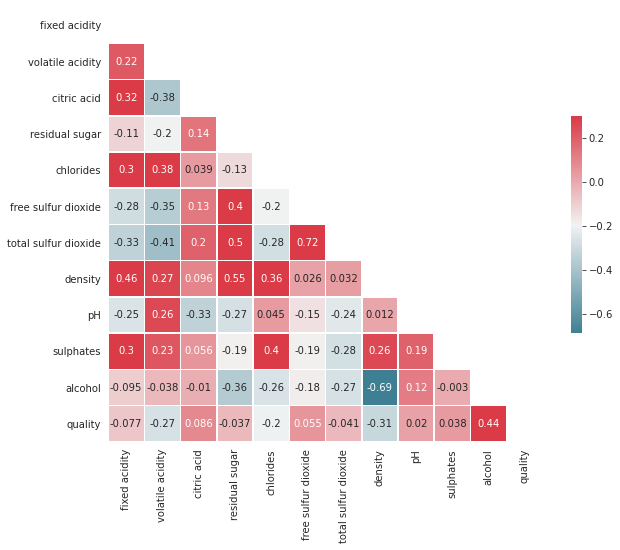

In [13]:
# heat map using corelation metrix 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

with sns.axes_style("white"):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [14]:
# what about the red wine

In [15]:
# Observation:

# from here we notice that impact of 'residual sugar', 'free sulfur dioxide' and 'ph' on 'quality' is neglisible. So we can drop them. Also we observer that similarity between 'alcohol' and 'quality' is maximum.

In [16]:
wine.drop(["residual sugar",'free sulfur dioxide','pH'],axis = 1,inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.0,0.27,0.36,0.045,170.0,1.0010,0.45,8.8,6
1,6.3,0.30,0.34,0.049,132.0,0.9940,0.49,9.5,6
2,8.1,0.28,0.40,0.050,97.0,0.9951,0.44,10.1,6
3,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,9.9,6
4,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,9.9,6


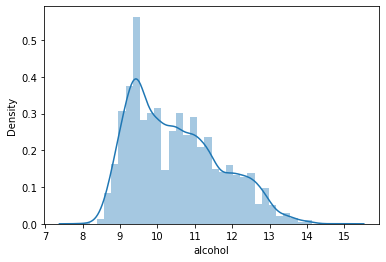

In [17]:
sns.distplot(wine['alcohol'])
plt.show()
# univariate analysis on alcohol

In [18]:
# to further analyze split alcohol into 3 parts such as low, medium, and high
bins = [0, 10, 12, 15]
labels = ["low","median","high"]
wine['alcohol_label'] = pd.cut(wine['alcohol'], bins=bins, labels=labels)
wine.drop('alcohol',axis =1, inplace = True)
wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality,alcohol_label
0,7.0,0.27,0.36,0.045,170.0,1.0010,0.45,6,low
1,6.3,0.30,0.34,0.049,132.0,0.9940,0.49,6,low
2,8.1,0.28,0.40,0.050,97.0,0.9951,0.44,6,median
3,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,6,low
4,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,6,low


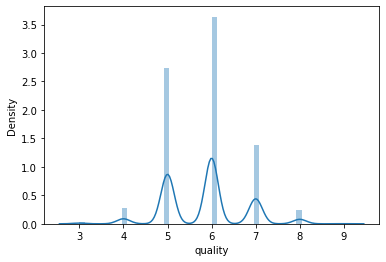

In [19]:
sns.distplot(wine['quality'])
plt.show() # now for quality

In [20]:
bins = [0, 4, 6, 10]
labels = ["poor","normal","excellent"]
wine['quality_label'] = pd.cut(wine['quality'], bins=bins, labels=labels)
wine.drop('quality',axis =1, inplace = True)
wine.head()
# We can split quality also into three small chuncks such as poor i.e. from 0 to 4, normal i.e. from 5 or 6 and excellent i.e. from 7 to 10

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol_label,quality_label
0,7.0,0.27,0.36,0.045,170.0,1.0010,0.45,low,normal
1,6.3,0.30,0.34,0.049,132.0,0.9940,0.49,low,normal
2,8.1,0.28,0.40,0.050,97.0,0.9951,0.44,median,normal
3,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,low,normal
4,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,low,normal


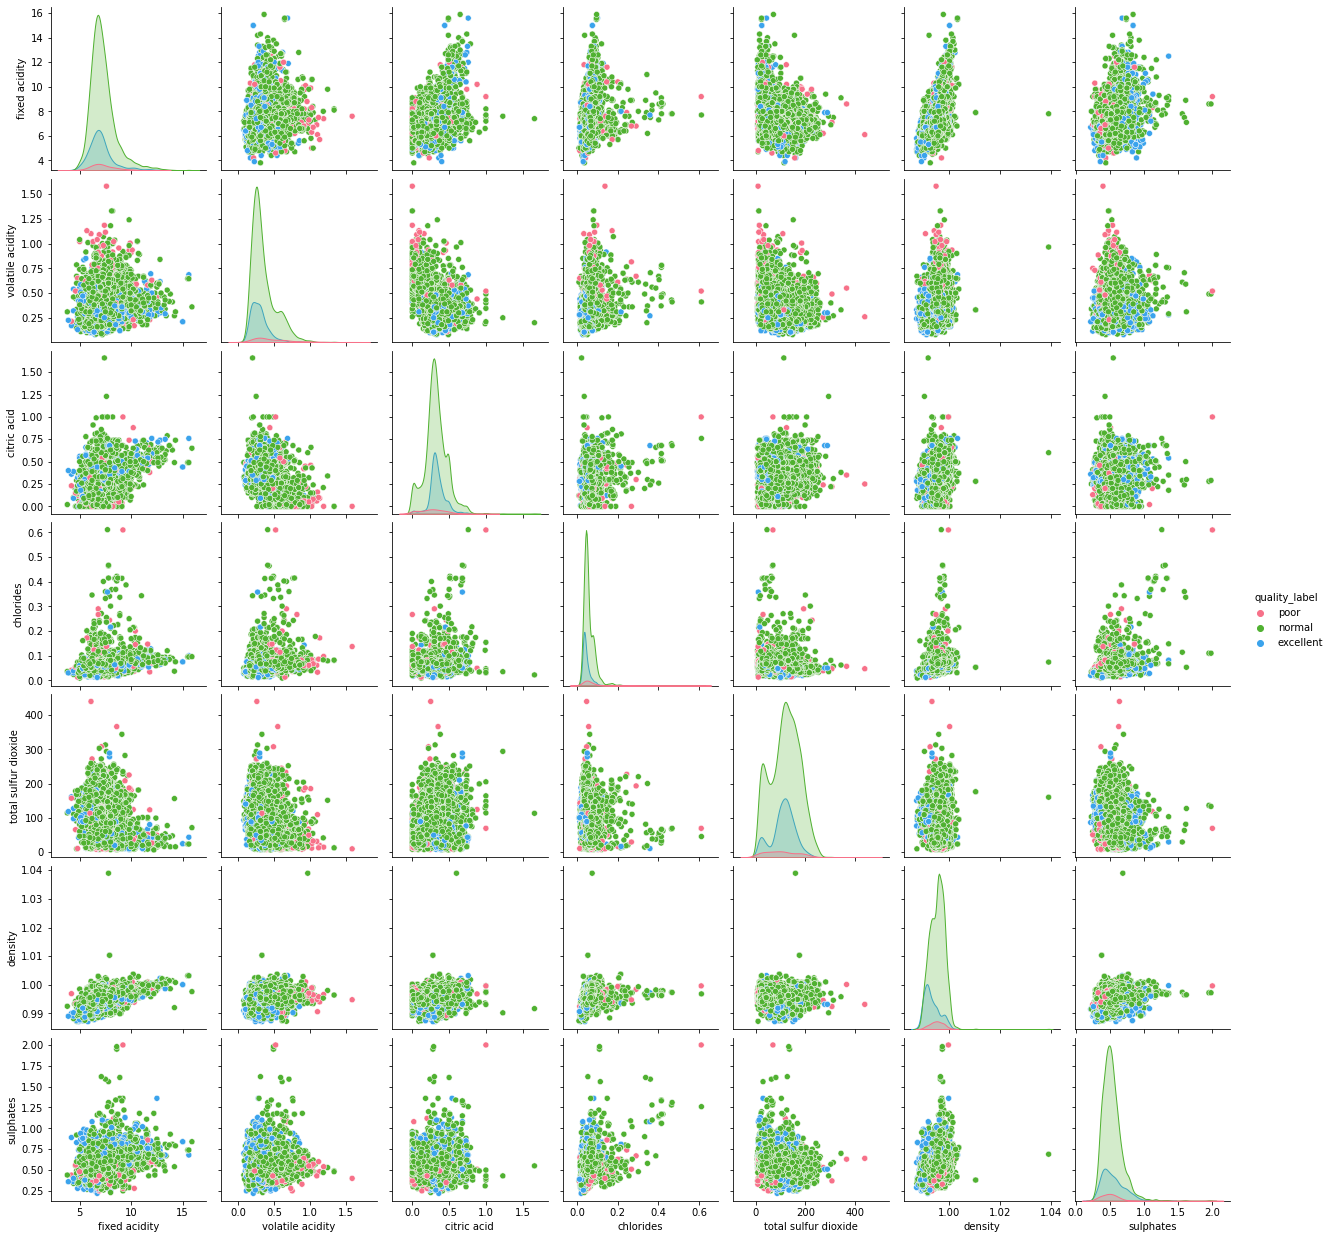

In [21]:
sns.pairplot(wine, hue="quality_label", palette="husl",diag_kind="kde")
plt.show() #using pairplots 

In [22]:
# To betermine wine qulity, volatile acidity and citric acid can be our important features as the overlap of their distributions are vary less in compare to others.



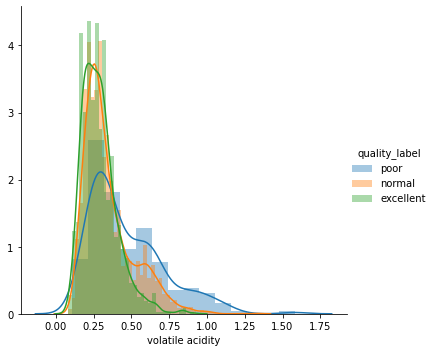

In [23]:
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'volatile acidity').add_legend()
plt.show()

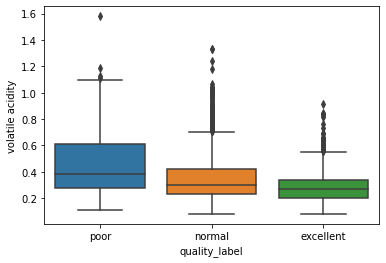

In [24]:
sns.boxplot(x='quality_label',y='volatile acidity', data=wine)
plt.show() # From this plot we can assure that, More than 50% of our excellent catagory wine have volatile acidity in between 0.3 to 0.5.



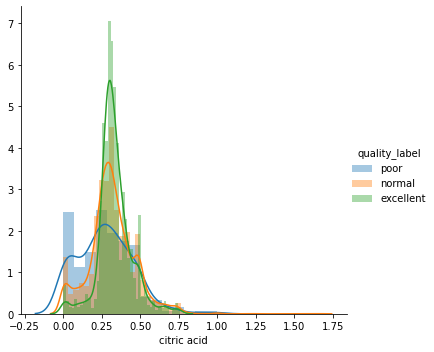

In [25]:
sns.FacetGrid(wine,hue='quality_label', height=5).map(sns.distplot,'citric acid').add_legend()
plt.show()

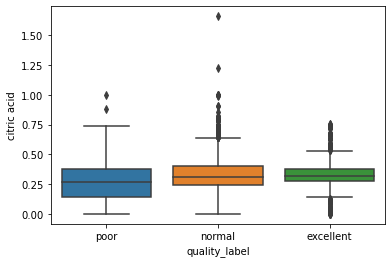

In [26]:
sns.boxplot(x='quality_label', y='citric acid',data=wine)
plt.show()

In [27]:
# observation : from this plot we see that normal will have citric acide from .25 - 45

In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   chlorides             6497 non-null   float64 
 4   total sulfur dioxide  6497 non-null   float64 
 5   density               6497 non-null   float64 
 6   sulphates             6497 non-null   float64 
 7   alcohol_label         6497 non-null   category
 8   quality_label         6497 non-null   category
dtypes: category(2), float64(7)
memory usage: 368.4 KB


In [29]:
wine['alcohol_label'].value_counts()

low       2832
median    2813
high       852
Name: alcohol_label, dtype: int64

In [30]:
# Convert category values to numeric values by creating dummy featutes.
df_wine = pd.get_dummies(wine, columns=['alcohol_label'], drop_first=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,quality_label,alcohol_label_median,alcohol_label_high
0,7.0,0.27,0.36,0.045,170.0,1.0010,0.45,normal,0,0
1,6.3,0.30,0.34,0.049,132.0,0.9940,0.49,normal,0,0
2,8.1,0.28,0.40,0.050,97.0,0.9951,0.44,normal,1,0
3,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,normal,0,0
4,7.2,0.23,0.32,0.058,186.0,0.9956,0.40,normal,0,0


In [31]:
result = df_wine['quality_label']
df_wine.drop(['quality_label'], axis=1, inplace=True)
print(df_wine.shape, result.shape)

(6497, 9) (6497,)


In [32]:
# use 70% of the data for training and 30% for testing
X_train, X_test, Y_train, Y_test = train_test_split(df_wine, result, test_size=0.30, random_state=11)

In [33]:
# For KNN our dataset must have to standardised.
# No need standardised quality_label as it is the result column

scaler = StandardScaler()
scaler.fit(df_wine)
scaled_features = scaler.transform(df_wine)
df_wine_sc = pd.DataFrame(scaled_features, columns=df_wine.columns)

In [34]:
# use 70% of the data for training and 30% for testing
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(df_wine_sc, result, test_size=0.30, random_state=11)

In [35]:
# convert dataframe to nd numpy array
X_train_sc = X_train_sc.to_numpy()
y_train_sc = y_train_sc.to_numpy()

In [36]:
def apply_knn(neigh, weight='uniform'):
    knn = KNeighborsClassifier(n_neighbors=neigh, weights=weight)
    knn.fit(X_train_sc,y_train_sc)
    pred_knn = knn.predict(X_test_sc)
    return pred_knn

In [37]:
pred_knn_for_20 = apply_knn(20)
print('Accuracy of model at K=20 is', accuracy_score(y_test_sc, pred_knn_for_20))

Accuracy of model at K=20 is 0.7825641025641026


In [38]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_sc, y_train_sc)
pred_lr = clf.predict(X_test_sc)
print('Accuracy of model is', accuracy_score(y_test_sc, pred_lr))

Accuracy of model is 0.7692307692307693


In [39]:
model = KNeighborsClassifier()

params = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}

gs = GridSearchCV(model, params, cv = 5, n_jobs=-1)

gs_results = gs.fit(X_train_sc, y_train_sc)

In [40]:
print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.8302131312032301
Best Parametrs:  {'n_neighbors': 43, 'weights': 'distance'}


In [41]:
best_k = 13
best_weights = 'distance'
pred_knn_for_Best_k = apply_knn(best_k, best_weights)
print('Accuracy of model at K=13 is ', accuracy_score(y_test_sc, pred_knn_for_Best_k))

Accuracy of model at K=13 is  0.8338461538461538


In [42]:
model = LogisticRegression(max_iter=10000)

params = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4], 'penalty': ['l1', 'l2']}]

gs = GridSearchCV(model, params, cv=5, n_jobs=-1)

gs_results = gs.fit(X_train_sc, y_train_sc)

In [43]:
print('Best Accuracy: ', gs_results.best_score_)
print('Best Parametrs: ', gs_results.best_params_)

Best Accuracy:  0.7714955451589114
Best Parametrs:  {'C': 1, 'penalty': 'l2'}


In [44]:
lr = LogisticRegression(C=1, penalty='l2', random_state=0)

lr.fit(X_train_sc, y_train_sc)

pred_lr_for_Best_param = lr.predict(X_test_sc)

print('Accuracy of model at C = 1 and Penalty = l2 is', accuracy_score(y_test_sc, pred_lr_for_Best_param))

Accuracy of model at C = 1 and Penalty = l2 is 0.7692307692307693


In [45]:
knn = KNeighborsClassifier(n_neighbors=13,weights='distance')
scores_knn = cross_val_score(knn, X_train_sc, y_train_sc, cv=10, scoring='accuracy')

In [46]:
print(scores_knn)


[0.84175824 0.84175824 0.82417582 0.86153846 0.82637363 0.82857143
 0.81098901 0.81718062 0.82819383 0.81277533]


In [47]:
print(scores_knn.mean())


0.8293314614900517


In [48]:
lr = LogisticRegression(C=1, penalty='l2',random_state=0)
scores_lr = cross_val_score(lr, X_train_sc, y_train_sc, cv=10, scoring='accuracy')

In [49]:
print(scores_lr)

[0.77582418 0.76703297 0.76923077 0.8021978  0.76923077 0.76483516
 0.76483516 0.78193833 0.77312775 0.75330396]


In [50]:
print(scores_lr.mean())

0.7721556857239678


In [51]:
print(pd.DataFrame(y_test_sc)['quality_label'].value_counts())

normal       1489
excellent     390
poor           71
Name: quality_label, dtype: int64


In [52]:
cm = confusion_matrix(y_test_sc, pred_knn_for_Best_k)

In [53]:
names = ["excellent","normal","poor"]
print(pd.DataFrame(cm, index=names, columns=names))

           excellent  normal  poor
excellent        218     172     0
normal            89    1400     0
poor               3      60     8


In [54]:
cm = confusion_matrix(y_test_sc, pred_lr_for_Best_param)

In [55]:
names = ["excellent","normal","poor"]
print(pd.DataFrame(cm, index=names, columns=names))

           excellent  normal  poor
excellent         76     314     0
normal            64    1424     1
poor               1      70     0
